<a href="https://colab.research.google.com/github/shubham3032002/Autoencoder-/blob/main/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip -q install tensorflow numpy matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam


In [3]:
(X_train, _),(X_test, _)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [20]:
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0
# Flatten the images
X_train = X_train.reshape((len(X_train), 784))
X_test = X_test.reshape((len(X_test), 784))

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

Training Data Shape: (60000, 784)
Testing Data Shape: (10000, 784)


In [24]:
encoding_dim = 32

# Encoder
input_layer = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Define Autoencoder model
autoencoder = Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Summary of the model
autoencoder.summary()

# Train the model
autoencoder.fit(X_train, X_train,
                epochs=200,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test))

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1001 - val_loss: 2.2767e-07
Epoch 2/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 2.2456e-07 - val_loss: 2.1399e-07
Epoch 3/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0999e-07 - val_loss: 1.9719e-07
Epoch 4/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9266e-07 - val_loss: 1.7850e-07
Epoch 5/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7360e-07 - val_loss: 1.5846e-07
Epoch 6/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.5325e-07 - val_loss: 1.3717e-07
Epoch 7/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.3164e-07 - val_loss: 1.1468e-07
Epoch 8/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0895e-07 - val_loss: 9.1710e-08
Epoch 9/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.6156e-08 - val_loss: 7.0056e-08
Epoch 10/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.5219e-08 - val_loss: 5.1748e-08
Epoch 11/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


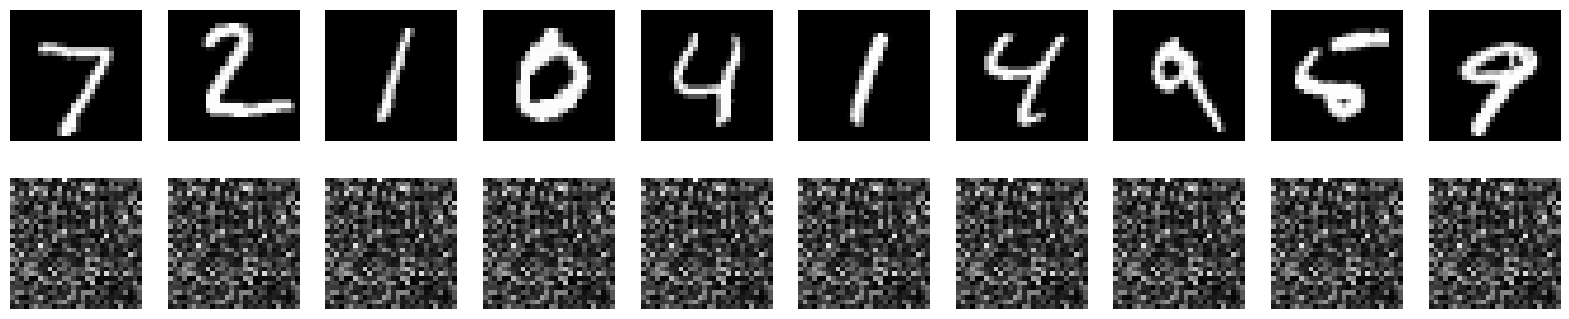

In [25]:
encoded_imgs=autoencoder.predict(X_test)
decoded_imgs=autoencoder.predict(encoded_imgs)

# Plot Original vs Reconstructed Images
n=10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax=plt.subplot(2,n,i+1)
  plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
  plt.axis('off')

  # Reconstructed Images
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
  plt.axis('off')

plt.show()

## Sparse Autoencoder

In [26]:
from tensorflow.keras.regularizers import l1

In [31]:
from re import DEBUG
encoding_dim=32

input_layer=Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_layer)
encoded = Dense(64, activation='relu')(encoded)
encoded=Dense(encoding_dim,activation='relu',activity_regularizer=l1(0.0001))(encoded)

# Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)


# Define Autoencoder model
sparse_autoencoder = Model(input_layer, decoded)

# Compile the model
sparse_autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Summary
sparse_autoencoder.summary()
sparse_autoencoder.fit(X_train, X_train,  # Input and output are the same
                        epochs=200,        # Number of epochs
                        batch_size=256,    # Batch size
                        shuffle=True,
                        validation_data=(X_test, X_test))

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_45 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_46 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_47 (Dense)                     │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1296 - val_loss: 1.6271e-04
Epoch 2/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.0352e-04 - val_loss: 2.8738e-05
Epoch 3/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.2524e-05 - val_loss: 1.1178e-05
Epoch 4/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 9.4732e-06 - val_loss: 5.8478e-06
Epoch 5/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 5.1569e-06 - val_loss: 3.5628e-06
Epoch 6/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 3.2176e-06 - val_loss: 2.3800e-06
Epoch 7/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.1836e-06 - val_loss: 1.6906e-06
Epoch 8/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5686e-06 - val_loss: 1.2546e-06
Epoch 9/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.1738e-06 - val_loss: 9.6191e-07
Epoch 10/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 9.0575e-07 - val_loss: 7.5637e-07
Epoch 11/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


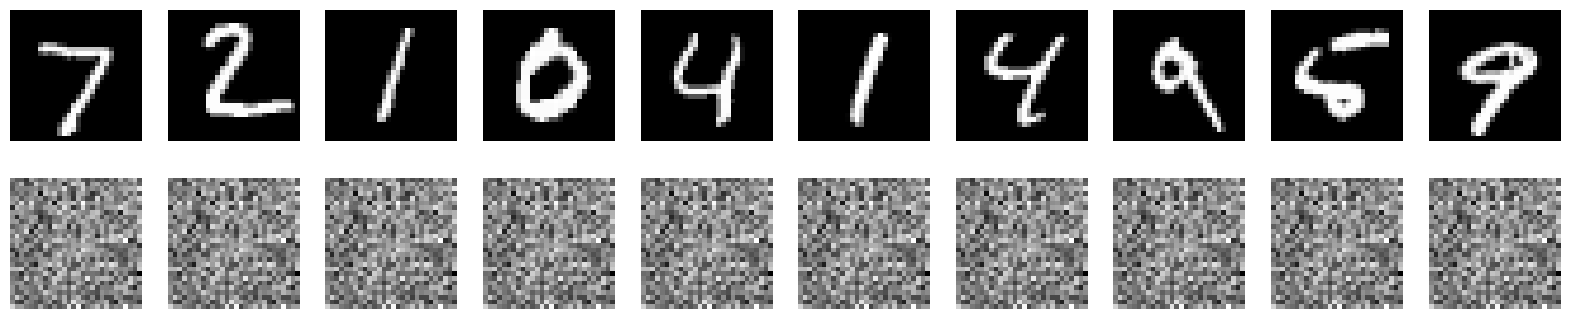

In [34]:
# Encode and decode test images
encoded_imgs = sparse_autoencoder.predict(X_test)
decoded_imgs = sparse_autoencoder.predict(encoded_imgs)

# Plot Original vs Reconstructed Images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original Images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Reconstructed Images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()


## Denoising Autoencoders

In [35]:
from tensorflow.keras.layers import GaussianNoise

In [36]:
#adding Gaussian noise
noise_factor = 0.2
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)

In [38]:
# Clip values to stay in the [0,1] range
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

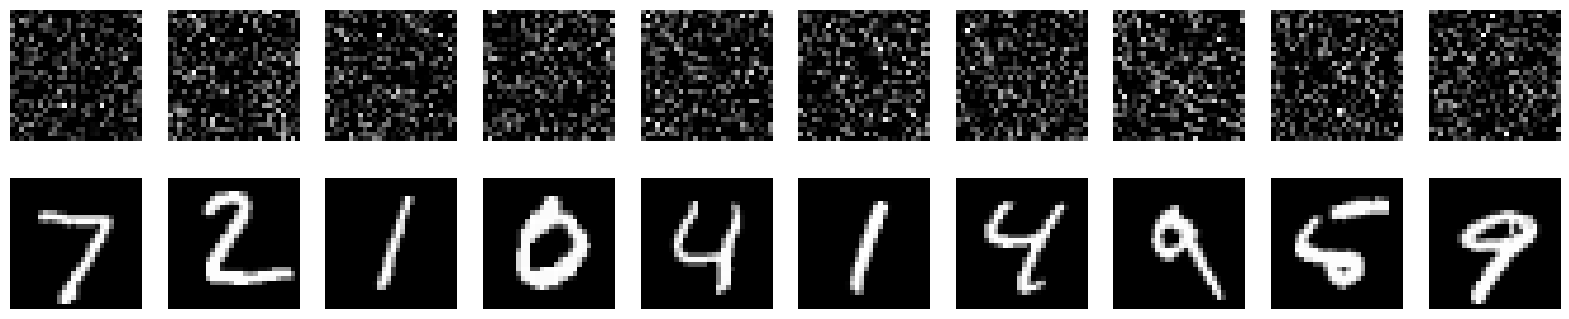

In [40]:
# Plot example of clean vs. noisy images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

In [41]:
# Define encoding dimension
encoding_dim = 32  # Size of the bottleneck layer

# Encoder with Gaussian Noise Layer
input_layer = Input(shape=(784,))
noisy_input = GaussianNoise(0.2)(input_layer)  # Add Gaussian noise layer
encoded = Dense(128, activation='relu')(noisy_input)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)  # Bottleneck

# Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)  # Output layer (same as input)

# Define Denoising Autoencoder model
denoising_autoencoder = Model(input_layer, decoded)

# Compile the model
denoising_autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Summary
denoising_autoencoder.summary()


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gaussian_noise (GaussianNoise)       │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_48 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_49 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Train the model
denoising_autoencoder.fit(x_train_noisy, X_train,  # Input is noisy, output is clean
                          epochs=200,               # Number of epochs
                          batch_size=256,          # Batch size
                          shuffle=True,
                          validation_data=(x_test_noisy, X_test))

Epoch 1/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.6439e-11 - val_loss: 2.6951e-11
Epoch 2/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6465e-11 - val_loss: 2.6951e-11
Epoch 3/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.6453e-11 - val_loss: 2.6951e-11
Epoch 4/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 2.6465e-11 - val_loss: 2.6951e-11
Epoch 5/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.6486e-11 - val_loss: 2.6951e-11
Epoch 6/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6554e-11 - val_loss: 2.6951e-11
Epoch 7/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6429e-11 - val_loss: 2.6951e-11
Epoch 8/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6492e-11 - val_loss: 2.6951e-11
Epoch 9/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6512e-11 - val_loss: 2.6951e-11
Epoch 10/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.6505e-11 - val_loss: 2.6951e-11
Epoch 11/200
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


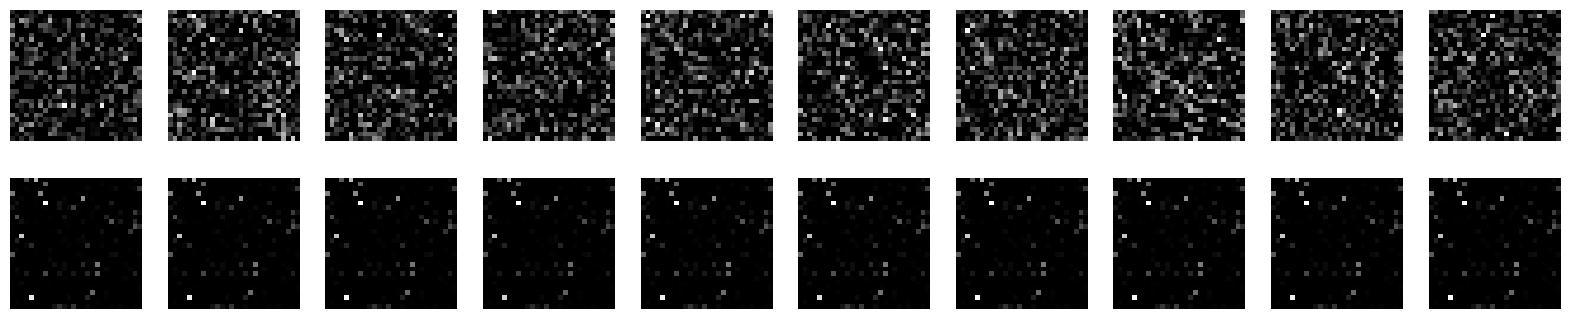

In [46]:
# Encode and decode test images
denoised_imgs = denoising_autoencoder.predict(x_test_noisy)

# Plot Noisy vs Denoised Images
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Noisy Images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Denoised Images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(denoised_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()


## Variational Autoencoders

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist


In [67]:
# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize images to [0,1] and flatten them (28x28 → 784)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape((x_train.shape[0], 784))  # Flatten images
x_test = x_test.reshape((x_test.shape[0], 784))     # Flatten images

print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)


Training data shape: (60000, 784)
Testing data shape: (10000, 784)


In [68]:
latent_dim = 2  # Dimensionality of latent space

# Encoder Model
inputs = Input(shape=(784,))
h = Dense(512, activation='relu')(inputs)
h = Dense(256, activation='relu')(h)

# Mean and Log Variance for latent space
z_mean = Dense(latent_dim)(h)
z_log_var = Dense(latent_dim)(h)

# Reparameterization trick
def sampling(args):
    z_mean, z_log_var = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim), mean=0., stddev=1.0)
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Sampled latent vector
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()


Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15            │ (None, 784)            │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_76 (Dense)          │ (None, 512)            │        401,920 │ input_layer_15[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_77 (Dense)          │ (None, 256)            │        131,328 │ dense_76[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_78 (Dense)          │ (None, 2)              │            514 │ dense_77[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_79 (Dense)          │ (None, 2)              │            514 │ dense_77[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_4 (Lambda)         │ (None, 2)              │              0 │ dense_78[0][0],        │
│                           │                        │                │ dense_79[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 534,276 (2.04 MB)

 Trainable params: 534,276 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
# Decoder Model
latent_inputs = Input(shape=(latent_dim,))
h_decoded = Dense(256, activation='relu')(latent_inputs)
h_decoded = Dense(512, activation='relu')(h_decoded)
outputs = Dense(784, activation='sigmoid')(h_decoded)  # Reconstruct image

# Decoder model
decoder = Model(latent_inputs, outputs, name="decoder")
decoder.summary()


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_80 (Dense)                     │ (None, 256)                 │             768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_81 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_82 (Dense)                     │ (None, 784)                 │         402,192 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 534,544 (2.04 MB)

 Trainable params: 534,544 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# Connect Encoder and Decoder
outputs = decoder(encoder(inputs)[2])  # Get latent vector from encoder
vae = Model(inputs, outputs, name="vae")

# Define VAE Loss: Reconstruction Loss + KL Divergence
def vae_loss(inputs, outputs, z_mean, z_log_var):
    reconstruction_loss = mse(inputs, outputs) * 784  # Scale by input size
    kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
    return K.mean(reconstruction_loss + kl_loss)

# Add loss properly
vae.add_loss(vae_loss(inputs, outputs, z_mean, z_log_var))
vae.compile(optimizer='adam')


ValueError: A KerasTensor cannot be used as input to a TensorFlow function. A KerasTensor is a symbolic placeholder for a shape and dtype, used when constructing Keras Functional models or Keras Functions. You can only use it as input to a Keras layer or a Keras operation (from the namespaces `keras.layers` and `keras.operations`). You are likely doing something like:

```
x = Input(...)
...
tf_fn(x)  # Invalid.
```

What you should do instead is wrap `tf_fn` in a layer:

```
class MyLayer(Layer):
    def call(self, x):
        return tf_fn(x)

x = MyLayer()(x)
```


In [61]:
vae.fit(x_train, x_train,
        epochs=50,
        batch_size=256,
        validation_data=(x_test, x_test))



ValueError: You must call `compile()` before using the model.

In [ ]:
# Encode test images to latent space
z_mean, _, _ = encoder.predict(x_test)

# Plot 2D latent space
plt.figure(figsize=(8, 6))
sns.scatterplot(x=z_mean[:, 0], y=z_mean[:, 1], alpha=0.5)
plt.xlabel("Latent Dimension 1")
plt.ylabel("Latent Dimension 2")
plt.title("Latent Space Representation")
plt.show()


In [ ]:
# Generate random latent vectors
random_latent_vectors = np.random.normal(size=(10, latent_dim))

# Decode to generate new images
generated_images = decoder.predict(random_latent_vectors)

# Plot generated images
plt.figure(figsize=(20, 4))
for i in range(10):
    ax = plt.subplot(1, 10, i + 1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()
